* 학번 : 20140736
* 이름 : 이창현

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from matplotlib import font_manager,rc

font_name=font_manager.FontProperties(fname="C:/windows/Fonts/malgun.ttf").get_name()
rc('font',family=font_name)

mpl.rcParams['axes.unicode_minus'] = False

plt.rcParams["figure.figsize"] = (14,6) #set size of Graph

In [15]:
cd D:\4학년1학기\탐색적데이터분석

D:\4학년1학기\탐색적데이터분석


In [2]:
cd E:\미세먼지

E:\미세먼지


In [3]:
mise_161=pd.read_csv('2016Q1.csv')
mise_162=pd.read_csv('2016Q2.csv')
mise_163=pd.read_csv('2016Q3.csv')
mise_164=pd.read_csv('2016Q4.csv')

mise_171=pd.read_csv('2017Q1.csv')
mise_172=pd.read_csv('2017Q2.csv')
mise_173=pd.read_csv('2017Q3.csv')
mise_174=pd.read_csv('2017Q4.csv')

mise_181=pd.read_csv('2018Q1.csv')
mise_182=pd.read_csv('2018Q2.csv')
mise_183=pd.read_csv('2018Q3.csv')
mise_184=pd.read_csv('2018Q4.csv')

In [4]:
mise_16 = pd.concat([mise_161, mise_162, mise_163, mise_164], ignore_index=True, sort = True) #ignore : 인덱스초기화
mise_17 = pd.concat([mise_171, mise_172, mise_173, mise_174], ignore_index=True, sort = True)
mise_18 = pd.concat([mise_181, mise_182, mise_183, mise_184], ignore_index=True, sort = True)

In [5]:
mise = pd.concat([mise_16, mise_17, mise_18],ignore_index=True, sort = True)

In [6]:
mise.to_csv('mise161718.csv',encoding='ms949')

In [8]:
mise.head()

,CO,NO2,O3,PM10,PM25,SO2,망,주소,지역,측정소명,측정소코드,측정일시
0,0.6,0.015,0.023,47.0,38.0,0.004,NaN,강원 강릉시 옥천동,강원 강릉시,옥천동,632132,2016010101
1,0.6,0.015,0.024,51.0,43.0,0.004,NaN,강원 강릉시 옥천동,강원 강릉시,옥천동,632132,2016010102
2,0.6,0.014,0.024,52.0,44.0,0.004,NaN,강원 강릉시 옥천동,강원 강릉시,옥천동,632132,2016010103
3,0.6,0.013,0.024,45.0,38.0,0.003,NaN,강원 강릉시 옥천동,강원 강릉시,옥천동,632132,2016010104
4,0.6,0.013,0.025,43.0,37.0,0.004,NaN,강원 강릉시 옥천동,강원 강릉시,옥천동,632132,2016010105


In [10]:
mise.to_csv('mise0.csv',encoding='ms949')

In [72]:
mise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8990691 entries, 0 to 8990690
Data columns (total 17 columns):
CO       float64
NO2      float64
O3       float64
PM10     float64
PM25     float64
SO2      float64
망        object
주소       object
지역       object
측정소명     object
측정소코드    int64
측정일시     int64
시도       object
연도       object
월        object
일        object
시간       object
dtypes: float64(6), int64(2), object(9)
memory usage: 1.1+ GB


In [8]:
new = mise['지역'].str.split(' ', n = 1, expand = True) 
mise['시도'] = new[0]

In [10]:
date = mise['측정일시'].astype(str)
mise['연도'] = date.str.slice(start=0, stop=4).astype(str)
mise['월'] = date.str.slice(start=4, stop=6).astype(str)
mise['일'] = date.str.slice(start=6, stop=8).astype(str)
mise['시간'] = date.str.slice(start=8, stop=10).astype(str)

In [13]:
miseLCH = mise.drop(['CO','NO2','O3','SO2','망','주소','측정소명','측정소코드'],1)

In [14]:
miseLCH = miseLCH[miseLCH['시간']== '11']

In [15]:
miseLCH = miseLCH.rename(index = str, columns={'PM10':'미세먼지','PM25':'초미세먼지'})

In [78]:
miseLCH.info()

<class 'pandas.core.frame.DataFrame'>
Index: 374601 entries, 10 to 8990677
Data columns (total 9 columns):
미세먼지     350301 non-null float64
초미세먼지    251716 non-null float64
지역       374601 non-null object
측정일시     374601 non-null int64
시도       374601 non-null object
연도       374601 non-null object
월        374601 non-null object
일        374601 non-null object
시간       374601 non-null object
dtypes: float64(2), int64(1), object(6)
memory usage: 28.6+ MB


In [92]:
miseLCH.shape

(374601, 9)

In [91]:
miseLCH['시도'].value_counts()

경기    91886
서울    42805
경남    26668
인천    23752
부산    23369
전남    20695
경북    20526
전북    19403
충남    18653
울산    17185
대구    14525
충북    14158
강원    12610
대전    11044
광주     9864
제주     4898
세종     2560
Name: 시도, dtype: int64

In [176]:
miseLCH0=miseLCH.groupby(by=['시도','측정일시']).max()
miseLCH0.reset_index(inplace=True)
miseLCH0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18632 entries, 0 to 18631
Data columns (total 9 columns):
시도       18632 non-null object
측정일시     18632 non-null int64
미세먼지     18626 non-null float64
초미세먼지    18484 non-null float64
지역       18632 non-null object
연도       18632 non-null object
월        18632 non-null object
일        18632 non-null object
시간       18632 non-null object
dtypes: float64(2), int64(1), object(6)
memory usage: 1.3+ MB


In [177]:
miseLCH00=miseLCH0[['시도','연도','월','미세먼지','초미세먼지']]
miseLCH00.groupby(['시도','연도']).describe().head()

미세먼지                                                           \
         count        mean        std   min   25%    50%     75%    max   
시도 연도                                                                     
강원 2016  366.0   72.620219  35.815747  16.0  48.0   64.0   93.75  335.0   
   2017  365.0   71.564384  35.649998  14.0  46.0   66.0   89.00  250.0   
   2018  365.0   60.095890  31.943530   7.0  36.0   57.0   74.00  196.0   
경기 2016  366.0  115.554645  59.499244  23.0  71.0  103.0  145.00  407.0   
   2017  365.0  112.435616  57.193707  24.0  75.0  103.0  137.00  413.0   

         초미세먼지                                                        
         count       mean        std   min    25%   50%   75%    max  
시도 연도                                                                 
강원 2016  366.0  44.939891  23.325492   6.0  27.00  39.0  60.0  154.0  
   2017  365.0  41.150685  24.159083   7.0  22.00  36.0  52.0  139.0  
   2018  365.0  37.723288  23.100060   2.0  19.00  34.0  50.0  149.0  
경기 2016  366.0  54.789617  30.032074   7.0  32.25  48.0  72.0  170.0  
   2017  365.0  63.205479  37.100902  10.0  34.00  56.0  85.0  204.0

Text(0.5,1,'3년(16~18년) 미세먼지(시도_연도) 시각=11시-대표=max')

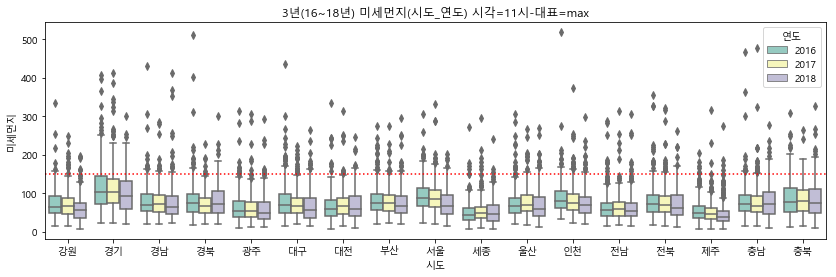

In [178]:
sns.boxplot(x='시도',y='미세먼지',hue='연도',data=miseLCH00,palette="Set3")
plt.axhline(151,color='red',linestyle=':')
plt.title('3년(16~18년) 미세먼지(시도_연도) 시각=11시-대표=max')

Text(0.5,1,'3년(16~18년) 초미세먼지(시도_연도) 시각=11시-대표=max')

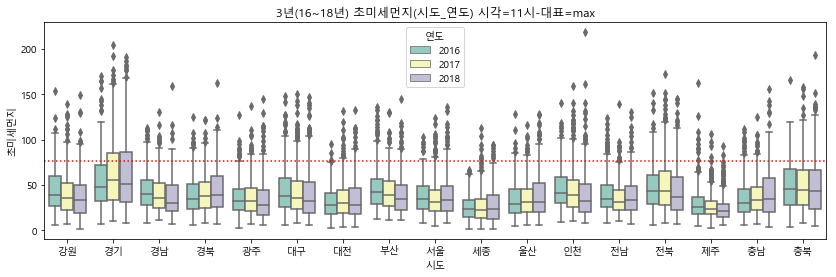

In [179]:
sns.boxplot(x='시도',y='초미세먼지',hue='연도',data=miseLCH00,palette="Set3")
plt.axhline(76,color='red',linestyle=':')
plt.title('3년(16~18년) 초미세먼지(시도_연도) 시각=11시-대표=max')

Text(0.5,1,'3년(16~18년) 미세먼지(월_연도) 시각=11시-대표=max')

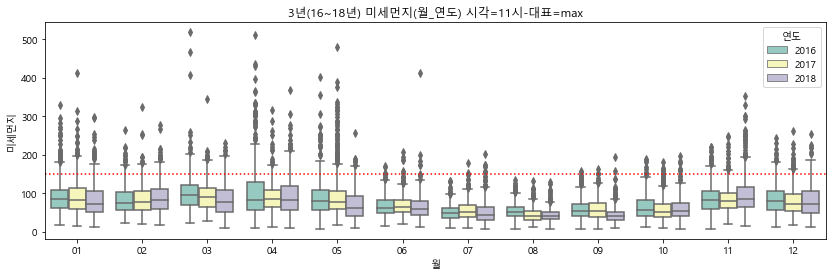

In [188]:
sns.boxplot(x='월',y='미세먼지',hue='연도',data=miseLCH00,palette="Set3")
plt.axhline(151,color='red',linestyle=':')
plt.title('3년(16~18년) 미세먼지(월_연도) 시각=11시-대표=max')

Text(0.5,1,'3년(16~18년) 초미세먼지(월_연도) 시각=11시-대표=max')

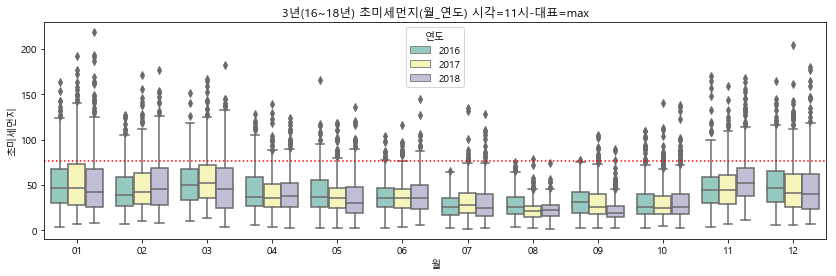

In [207]:
sns.boxplot(x='월',y='초미세먼지',hue='연도',data=miseLCH00,palette="Set3")
plt.axhline(76,color='red',linestyle=':')
plt.title('3년(16~18년) 초미세먼지(월_연도) 시각=11시-대표=max')

In [236]:
miseLCH00['시도'].value_counts()

충남    1096
충북    1096
전북    1096
세종    1096
광주    1096
경남    1096
제주    1096
대구    1096
서울    1096
전남    1096
부산    1096
대전    1096
경북    1096
강원    1096
경기    1096
인천    1096
울산    1096
Name: 시도, dtype: int64

In [234]:
miseLCH1 = miseLCH00[miseLCH00['시도'].values != '강원']
miseLCH1 = miseLCH1[miseLCH1['시도'].values != '경기']
miseLCH1 = miseLCH1[miseLCH1['시도'].values != '경남']
miseLCH1 = miseLCH1[miseLCH1['시도'].values != '경북']
miseLCH1 = miseLCH1[miseLCH1['시도'].values != '전북']
miseLCH1 = miseLCH1[miseLCH1['시도'].values != '전남']
miseLCH1 = miseLCH1[miseLCH1['시도'].values != '충남']
miseLCH1 = miseLCH1[miseLCH1['시도'].values != '충북']

In [235]:
miseLCH1['시도'].value_counts()

인천    1096
서울    1096
대구    1096
제주    1096
광주    1096
세종    1096
대전    1096
부산    1096
울산    1096
Name: 시도, dtype: int64

In [237]:
miseLCH1 = miseLCH1.rename(index = str, columns={'시도':'광역시'})

Text(0.5,1,'3년(16~18년) 미세먼지(광역시_연도) 시각=11시-대표=max')

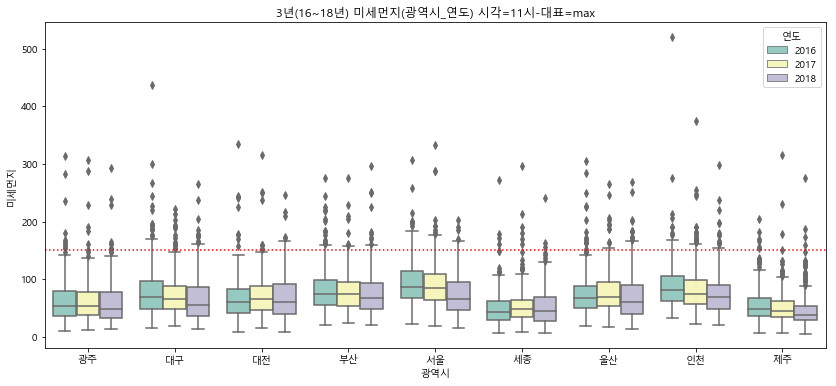

In [240]:
sns.boxplot(x='광역시',y='미세먼지',hue='연도',data=miseLCH1,palette="Set3")
plt.axhline(151,color='red',linestyle=':')
plt.title('3년(16~18년) 미세먼지(광역시_연도) 시각=11시-대표=max')

Text(0.5,1,'3년(16~18년) 초미세먼지(광역시_연도) 시각=11시-대표=max')

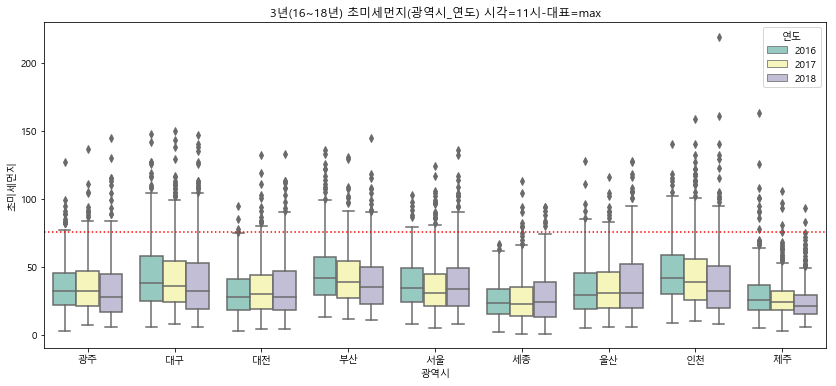

In [242]:
sns.boxplot(x='광역시',y='초미세먼지',hue='연도',data=miseLCH1,palette="Set3")
plt.axhline(76,color='red',linestyle=':')
plt.title('3년(16~18년) 초미세먼지(광역시_연도) 시각=11시-대표=max')

Text(0.5,1,'3년(16~18년) 미세먼지(광역시_연도) 시각=11시-대표=max')

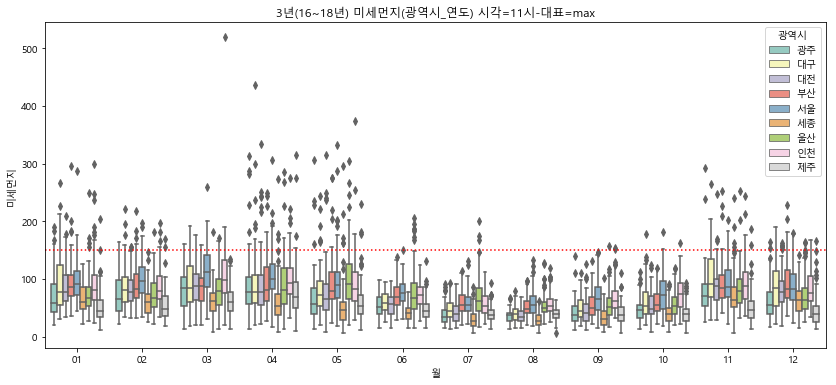

In [243]:
sns.boxplot(x='월',y='미세먼지',hue='광역시',data=miseLCH1,palette="Set3")
plt.axhline(151,color='red',linestyle=':')
plt.title('3년(16~18년) 미세먼지(광역시_연도) 시각=11시-대표=max')

Text(0.5,1,'3년(16~18년) 초미세먼지(광역시_연도) 시각=11시-대표=max')

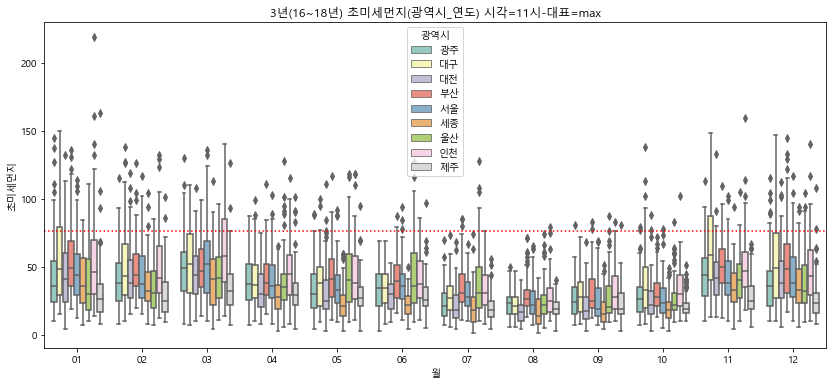

In [244]:
sns.boxplot(x='월',y='초미세먼지',hue='광역시',data=miseLCH1,palette="Set3")
plt.axhline(76,color='red',linestyle=':')
plt.title('3년(16~18년) 초미세먼지(광역시_연도) 시각=11시-대표=max')